In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sqlite3

sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]
plt.rcParams.update({'font.size': 15})

In [4]:
import cymetric as cym
import transition_metrics as tm
import dataframe_analysis as dta
#import transition_plots as tp # requires pyne

In [6]:
current_outfile = 'input_files/us_facilities_lwr.sqlite'

## Reactor Deployment

In [7]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
#mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'MMR_enter','MMR_exit']
#xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'Xe-100_enter', 'Xe-100_exit']

In [8]:
current_reactors = tm.get_lwr_totals(current_outfile, current_nonlwr)
current_reactors = dta.add_year(current_reactors)

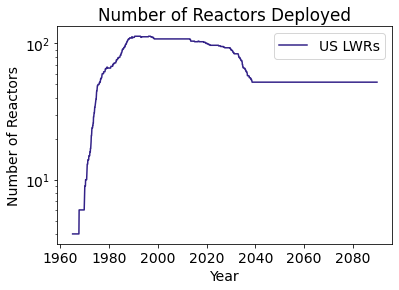

In [12]:
# Plot the numeber of reactors deployed

#plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='US LWRs', color=mycolors[0])
#plt.plot(mmr_nogrowth_reactors['Year'], mmr_nogrowth_reactors['mmr_total'], 'tab:purple',
#         label=r'USNC MMR$^{TM}$, Scenario 2')
#plt.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'],
#         'tab:orange', label='X-energy Xe-100, Scenrio 3')
#plt.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'],
#         'r', label='USNC MMR$^{TM}$, Scenario 4')
#plt.plot(xe_1percent_reactors['Year'], xe_1percent_reactors['xe_total'],
#         'g', label='X-energy Xe-100, Scenrio 5')
plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()

## Energy Output

In [10]:
current_energy = tm.get_annual_electricity(current_outfile)

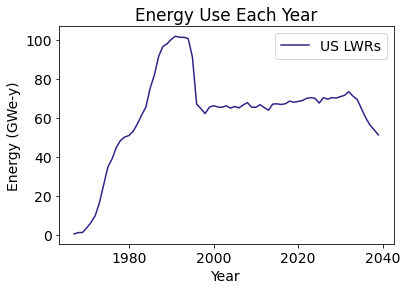

In [13]:
# Plot the yearly energy

time = np.linspace(2025,2089, 65)

#plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy'], label='US LWRs', color=mycolors[0])
#plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'],
#         'tab:purple', label='Scenario 2')
#plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'],
#         'tab:orange', label='Scenario 3')
#plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'],
#         'r', label='Scenario 4')
#plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'],
#         'g', label='Scenario 5')

plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

### Energy Produced by Reactor Type

Text(0.5, 0, 'Year')

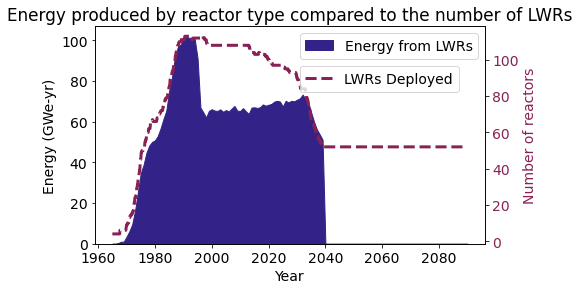

In [14]:
lwr_energy = tm.get_lwr_energy(current_outfile, ['MMR'])

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], labels=['Energy from LWRs'], color=mycolors[0])
ax1.legend()
ax1.set_ylabel('Energy (GWe-yr)')

ax2 = ax1.twinx()
ax2.plot(current_reactors['Year'], current_reactors['lwr_total'], color=mycolors[7],
         linestyle='--', linewidth=3, label='LWRs Deployed')
ax2.legend(loc=(0.525, 0.7))
ax2.set_ylabel('Number of reactors', color=mycolors[7])
ax2.tick_params(axis='y', labelcolor=mycolors[7])

plt.title('Energy produced by reactor type compared to the number of LWRs')
ax1.set_xlabel('Year')

## Energy Input

## Material Transactions
You can use:
```
sqlite3 -header -csv $database.sqlite "select * from $table;" > $table.csv
```
to create a csv from a sqlite database, but add_reciever_prototype is how you get transactions_df, that can be very unclear from the docstrings.

In [15]:
current_transactions = tm.add_receiver_prototype(current_outfile)

In [16]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')


Text(0.5, 1.0, 'Yearly Mass of uranium supplied to all reactors')

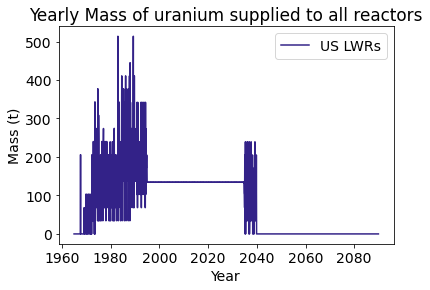

In [19]:
# Comparing fresh_uox transactions to all reactors
plt.figure()

plt.plot(current_uox['Year'], current_uox['Quantity']/1000,
         label='US LWRs', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity']/1000,
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity']/1000,
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity']/1000,
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity']/1000,
#          'tab:orange', label='Scenario 3')
plt.legend() #(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Yearly Mass of uranium supplied to all reactors')

Text(0.5, 1.0, 'Cumulative Mass of uranium supplied to all reactors')

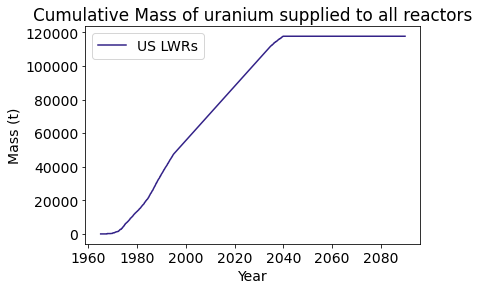

In [20]:
plt.figure()
plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000,
         label='US LWRs', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity'].cumsum()/1000,
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity'].cumsum()/1000,
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity'].cumsum()/1000,
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity'].cumsum()/1000,
#          'tab:orange', label='Scenario 3')
plt.legend(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Cumulative Mass of uranium supplied to all reactors')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [21]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [22]:
current_tails = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed = dta.calculate_feed(current_uox['Quantity'], current_tails)
current_swu = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails, x_t,
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = dta.add_year(current_swu)

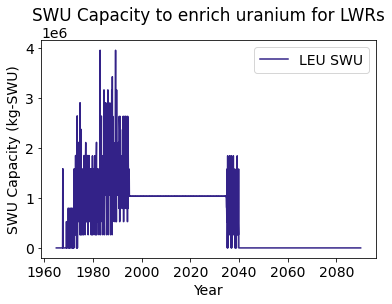

In [23]:
plt.plot(current_swu['Year'], current_swu['SWU'], label='LEU SWU', color=mycolors[0])

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()

# 480 Project


In [20]:
npre480_outfile = 'input_files/npre480.sqlite'

npre480_lwr = ['Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'NuclearRepository', 'United States Nuclear',
                'FuelCycle', 'LWReactors']

npre480_xe = ['Mine', 'Mill', 'Conversion',
             'Enrichment', 'FuelFab', 'NuclearRepository', 'United States Nuclear',
             'FuelCycle', 'Xe-100',
             'Xe-100_enter', 'Xe-100_exit']

npre480_reactors = tm.get_lwr_totals(npre480_outfile, npre480_lwr)
npre480_reactors = dta.add_year(npre480_reactors)

npre480_xe_reactors = tm.get_lwr_totals(npre480_outfile, npre480_xe)
npre480_xe_reactors = dta.add_year(npre480_xe_reactors)

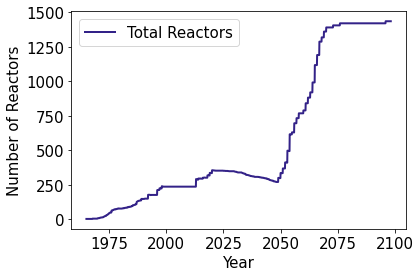

In [112]:
# Plot the numeber of reactors deployed

plt.plot(npre480_reactors['Year'], npre480_reactors['lwr_total'], label='Total Reactors', color=mycolors[0], linewidth='2')
#plt.plot(npre480_xe_reactors['Year'], npre480_xe_reactors['xe_total'],
#         color=mycolors[2], label='X-energy Xe-100, Scenrio 5')
#plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
#plt.yscale('log')
plt.legend()
plt.savefig('num_reactors_tot.pdf', bbox_inches='tight')

In [26]:
npre480_energy = tm.get_annual_electricity(npre480_outfile)

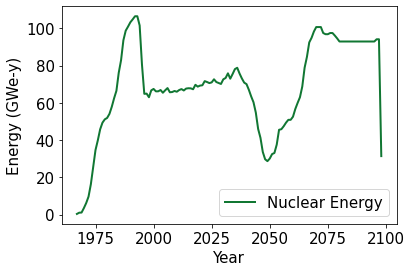

In [113]:
time = np.linspace(1967,2098, 132)

#plt.figure(figsize=(7,4))
plt.plot(npre480_energy['Year'], npre480_energy['Energy'], label='Nuclear Energy', color=mycolors[1], linewidth='2')
#plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'],
#         'tab:purple', label='Scenario 2')
#plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'],
#         'tab:orange', label='Scenario 3')
#plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'],
#         'r', label='Scenario 4')
#plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'],
#         'g', label='Scenario 5')

#plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

plt.savefig('yearly_energy_use.pdf', bbox_inches='tight')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [33]:
npre480_transactions = tm.add_receiver_prototype(npre480_outfile)
npre480_uox = dta.commodity_mass_traded(npre480_transactions, 'fresh_uox')

In [34]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [36]:
npre480_tails = dta.calculate_tails(npre480_uox['Quantity'], leu_p, x_t, x_f)
npre480_feed = dta.calculate_feed(npre480_uox['Quantity'], npre480_tails)
npre480_swu = dta.calculate_SWU(npre480_uox['Quantity'], leu_p,
                               npre480_tails, x_t,
                               npre480_feed, x_f)
npre480_swu = npre480_swu.to_frame().reset_index()
npre480_swu = npre480_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
npre480_swu = dta.add_year(npre480_swu)

the maximum swu is 3975743.9226184934


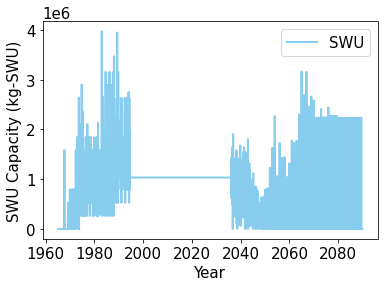

In [114]:
plt.plot(npre480_swu['Year'], npre480_swu['SWU'], label='SWU', color=mycolors[3], linewidth='2')

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
#title = plt.title('SWU Capacity', pad=18)
plt.legend()
print('the maximum swu is',npre480_swu['SWU'].max())
plt.savefig('total_swu.pdf', bbox_inches='tight')

In [68]:
swu_array = npre480_swu['SWU'].values
us_only_swu = swu_array.copy()
foregin_only_swu = swu_array.copy()

us_major60_swu = swu_array.copy()
us_minor40_swu = swu_array.copy()

foregin_major60_swu = swu_array.copy()
foregin_minor40_swu = swu_array.copy()

for i in range(len(us_major60_swu)):
    us_major60_swu[i] = us_major60_swu[i] * 0.6
    us_minor40_swu[i] = us_minor40_swu[i] * 0.4

    foregin_major60_swu[i] = foregin_major60_swu[i] * 0.6
    foregin_minor40_swu[i] = foregin_minor40_swu[i] * 0.4 

In [50]:
type(npre480_swu['SWU'])

pandas.core.series.Series

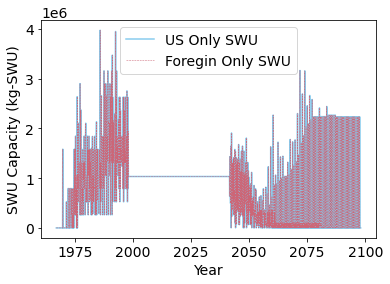

In [76]:
times = np.linspace(1967,2098,1500)
plt.plot(times, us_only_swu, color=mycolors[3], label='US Only SWU')
plt.plot(times, foregin_only_swu, '--', color=mycolors[5], linewidth=0.5, label='Foregin Only SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')can you 
plt.legend()

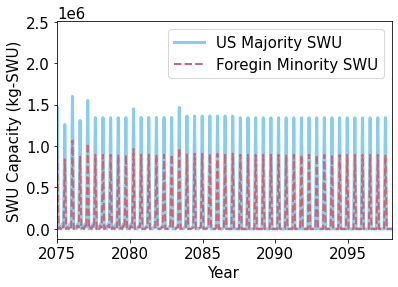

In [115]:
plt.plot(times, us_major60_swu, color=mycolors[3], label='US Majority SWU', linewidth=3)
plt.plot(times, foregin_minor40_swu, '--', color=mycolors[5], linewidth=2, label='Foregin Minority SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')

plt.xlim(2075,2098)

plt.legend()
plt.savefig('zoomed_us_maj_swu.pdf', bbox_inches='tight')

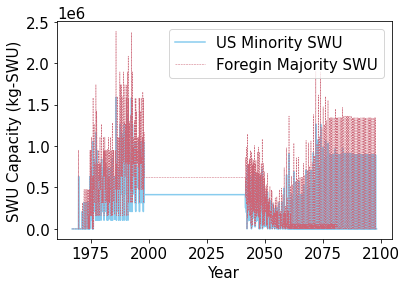

In [116]:
plt.plot(times, us_minor40_swu, color=mycolors[3], label='US Minority SWU')
plt.plot(times, foregin_major60_swu, '--', color=mycolors[5], linewidth=0.5, label='Foregin Majority SWU')
plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
plt.legend()
plt.savefig('us_min_swu.pdf', bbox_inches='tight')

In [83]:
replacement_reactors = {1976: 13,
 1987: 15,
 1989: 10,
 1992: 28,
 1996: 35,
 1997: 13,
 1998: 16,
 2013: 55,
 2014: 8,
 2016: 7,
 2018: 17,
 2019: 19,
 2020: 21,
 2049: 31,
 2050: 37,
 2051: 34,
 2052: 44,
 2053: 87,
 2054: 122,
 2055: 15,
 2056: 67,
 2057: 37,
 2058: 35,
 2060: 21,
 2061: 52,
 2062: 41,
 2063: 38,
 2064: 72,
 2065: 126,
 2066: 73,
 2067: 97,
 2068: 31,
 2069: 42,
 2070: 30,
 2073: 15,
 2076: 15,
 2096: 15}

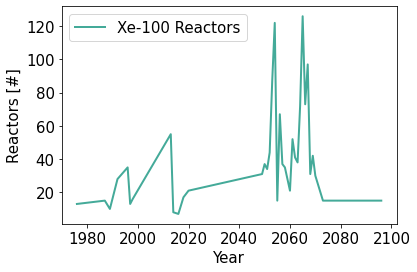

In [117]:
plt.plot(replacement_reactors.keys(),replacement_reactors.values(), color=mycolors[2], label='Xe-100 Reactors', linewidth='2')
plt.ylabel('Reactors [#]')
plt.xlabel('Year')
plt.legend()
plt.savefig('num_xe100s_deployed.pdf', bbox_inches='tight')